In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
dataset = pd.read_csv("california_housing.csv", sep=";")

In [3]:
dataset

Latitude  Longitude  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0         37.88    -122.23  8.3252      41.0  6.984127   1.023810       322.0   
1         37.86    -122.22  8.3014      21.0  6.238137   0.971880      2401.0   
2         37.85    -122.24  7.2574      52.0  8.288136   1.073446       496.0   
3         37.85    -122.25  5.6431      52.0  5.817352   1.073059       558.0   
4         37.85    -122.25  3.8462      52.0  6.281853   1.081081       565.0   
...         ...        ...     ...       ...       ...        ...         ...   
20635     39.48    -121.09  1.5603      25.0  5.045455   1.133333       845.0   
20636     39.49    -121.21  2.5568      18.0  6.114035   1.315789       356.0   
20637     39.43    -121.22  1.7000      17.0  5.205543   1.120092      1007.0   
20638     39.43    -121.32  1.8672      18.0  5.329513   1.171920       741.0   
20639     39.37    -121.24  2.3886      16.0  5.254717   1.162264      1387.0   

       AveOccup  Ocean_proximity  MedValue  
0      2.555556                0     4.526  
1      2.109842                0     3.585  
2      2.802260                0     3.521  
3      2.547945                0     3.413  
4      2.181467                0     3.422  
...         ...              ...       ...  
20635  2.560606                2     0.781  
20636  3.122807                2     0.771  
20637  2.325635                2     0.923  
20638  2.123209                2     0.847  
20639  2.616981                2     0.894  

[20640 rows x 10 columns]

In [4]:
dataset.dtypes

Latitude           float64
Longitude          float64
MedInc             float64
HouseAge           float64
AveRooms           float64
AveBedrms          float64
Population         float64
AveOccup           float64
Ocean_proximity      int64
MedValue           float64
dtype: object

In [5]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [6]:
nan_percent = missing_percent(dataset)
nan_percent

Series([], dtype: float64)

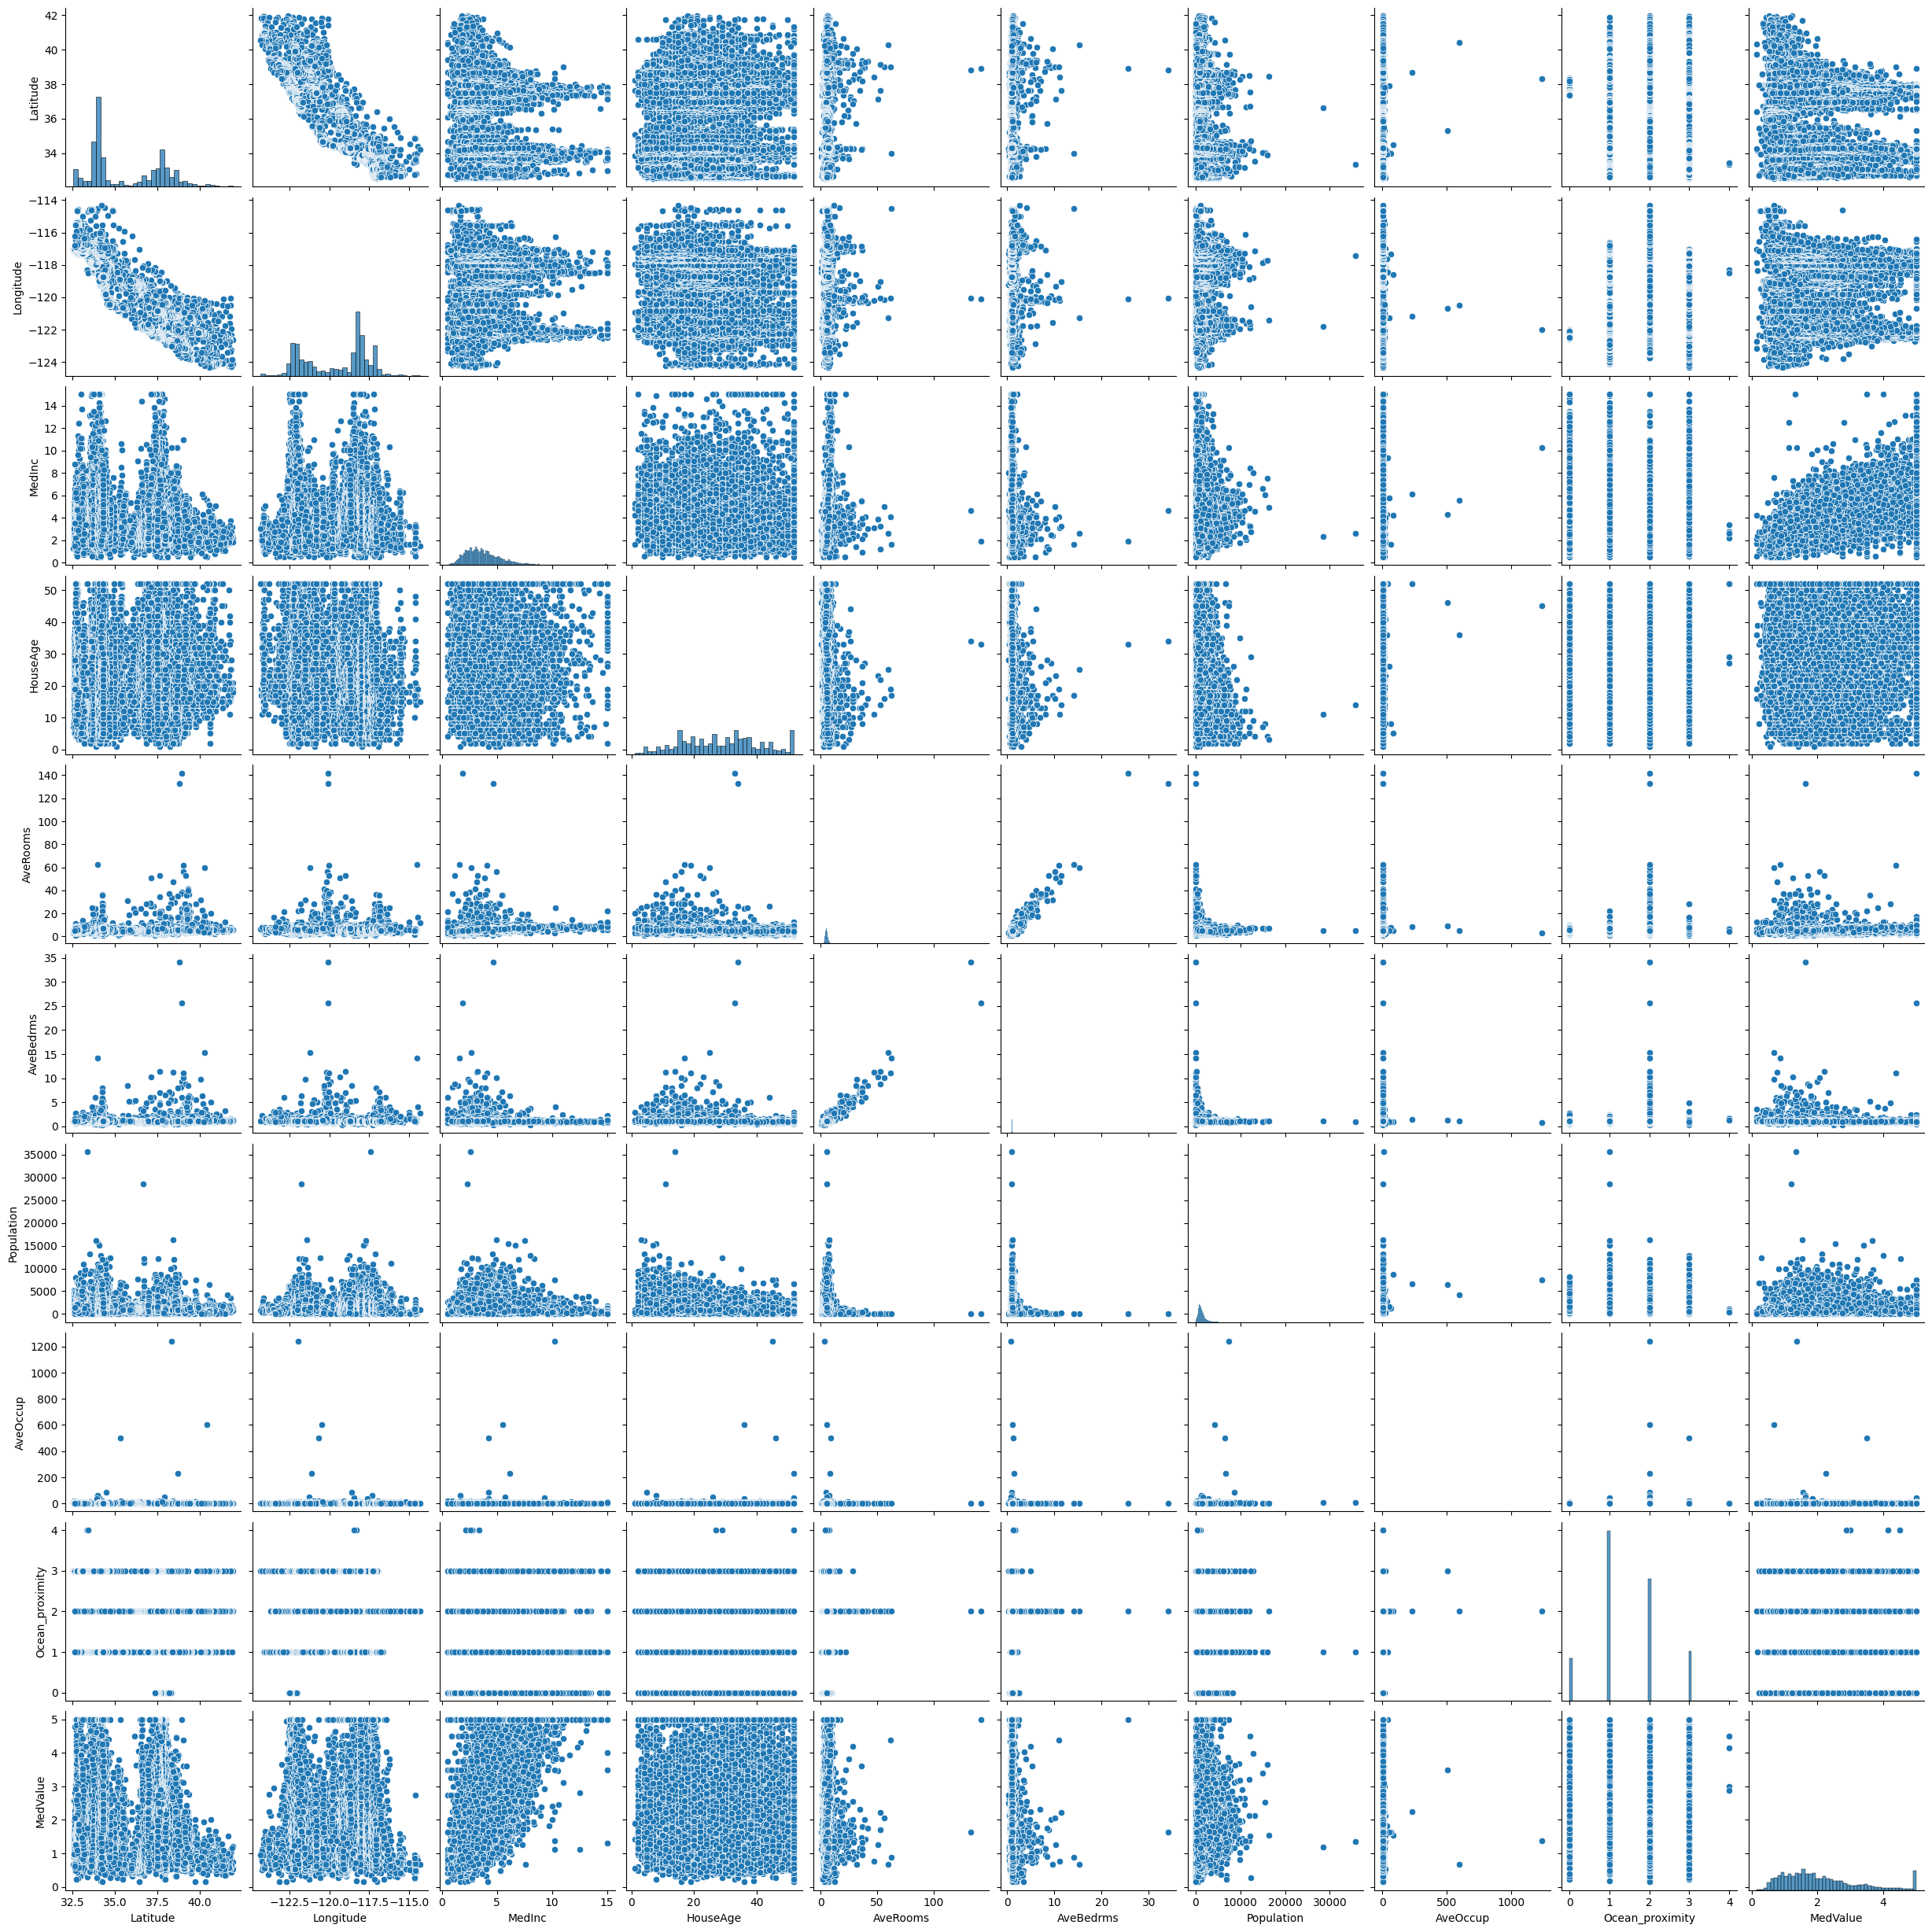

In [7]:
sns.pairplot(dataset)

In [8]:
scaler = StandardScaler()
scaler.fit(dataset.drop(columns=["MedValue"]).values)
scaled_data = scaler.transform(dataset.drop(columns=["MedValue"]).values)

In [9]:
pca = PCA()
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

In [10]:
transformed_dataset = pd.DataFrame(
    transformed_data, 
    columns=['PC%s' % _ for _ in range(1,transformed_data.shape[1]+1)],
)
transformed_dataset["MedValue"] = dataset["MedValue"]

In [11]:
transformed_dataset

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      2.180715 -0.619499 -0.837205  2.694229 -0.247385  0.658556  0.163668   
1      1.599350 -0.292097  1.374170  2.763474 -0.512254 -0.085069  0.058978   
2      2.384675 -0.589982 -1.423443  2.379305  0.071663  0.157279  0.727571   
3      1.974554 -1.356600 -1.384045  1.665854  0.149235 -0.259683  0.460085   
4      1.988289 -1.423771 -1.496673  0.981189  0.258053 -0.737297  0.252427   
...         ...       ...       ...       ...       ...       ...       ...   
20635  1.444831 -0.827443  0.414604 -1.611947 -0.026602  0.187010 -0.397014   
20636  1.833273 -0.143767  0.466627 -1.326199 -0.142862  0.620262 -0.831388   
20637  1.423059 -0.617273  0.924237 -1.567893 -0.183420  0.228985 -0.708464   
20638  1.558259 -0.562931  0.717223 -1.538262 -0.201926  0.349190 -0.748444   
20639  1.402485 -0.434532  1.202796 -1.280736 -0.192203  0.214500 -0.497567   

            PC8       PC9  MedValue  
0      0.025754 -0.151977     4.526  
1      0.183054 -0.195391     3.585  
2     -0.357407  0.147738     3.521  
3      0.025238 -0.094481     3.413  
4     -0.244243  0.204847     3.422  
...         ...       ...       ...  
20635 -0.428460 -0.390951     0.781  
20636 -0.288666 -0.404207     0.771  
20637 -0.390345 -0.295768     0.923  
20638 -0.319140 -0.308040     0.847  
20639 -0.272646 -0.384056     0.894  

[20640 rows x 10 columns]

In [12]:
explained_variance_ratio = pd.DataFrame(
    pca.explained_variance_ratio_, 
    columns=["explained variance ratio"], 
    index=transformed_dataset.drop(columns=["MedValue"]).columns
).apply(lambda x: x*100).round(2)

In [13]:
explained_variance_ratio

explained variance ratio
PC1                     22.64
PC2                     21.35
PC3                     14.19
PC4                     13.02
PC5                     11.15
PC6                      9.87
PC7                      6.41
PC8                      0.86
PC9                      0.50

In [14]:
fig = px.bar(explained_variance_ratio)
fig.show()

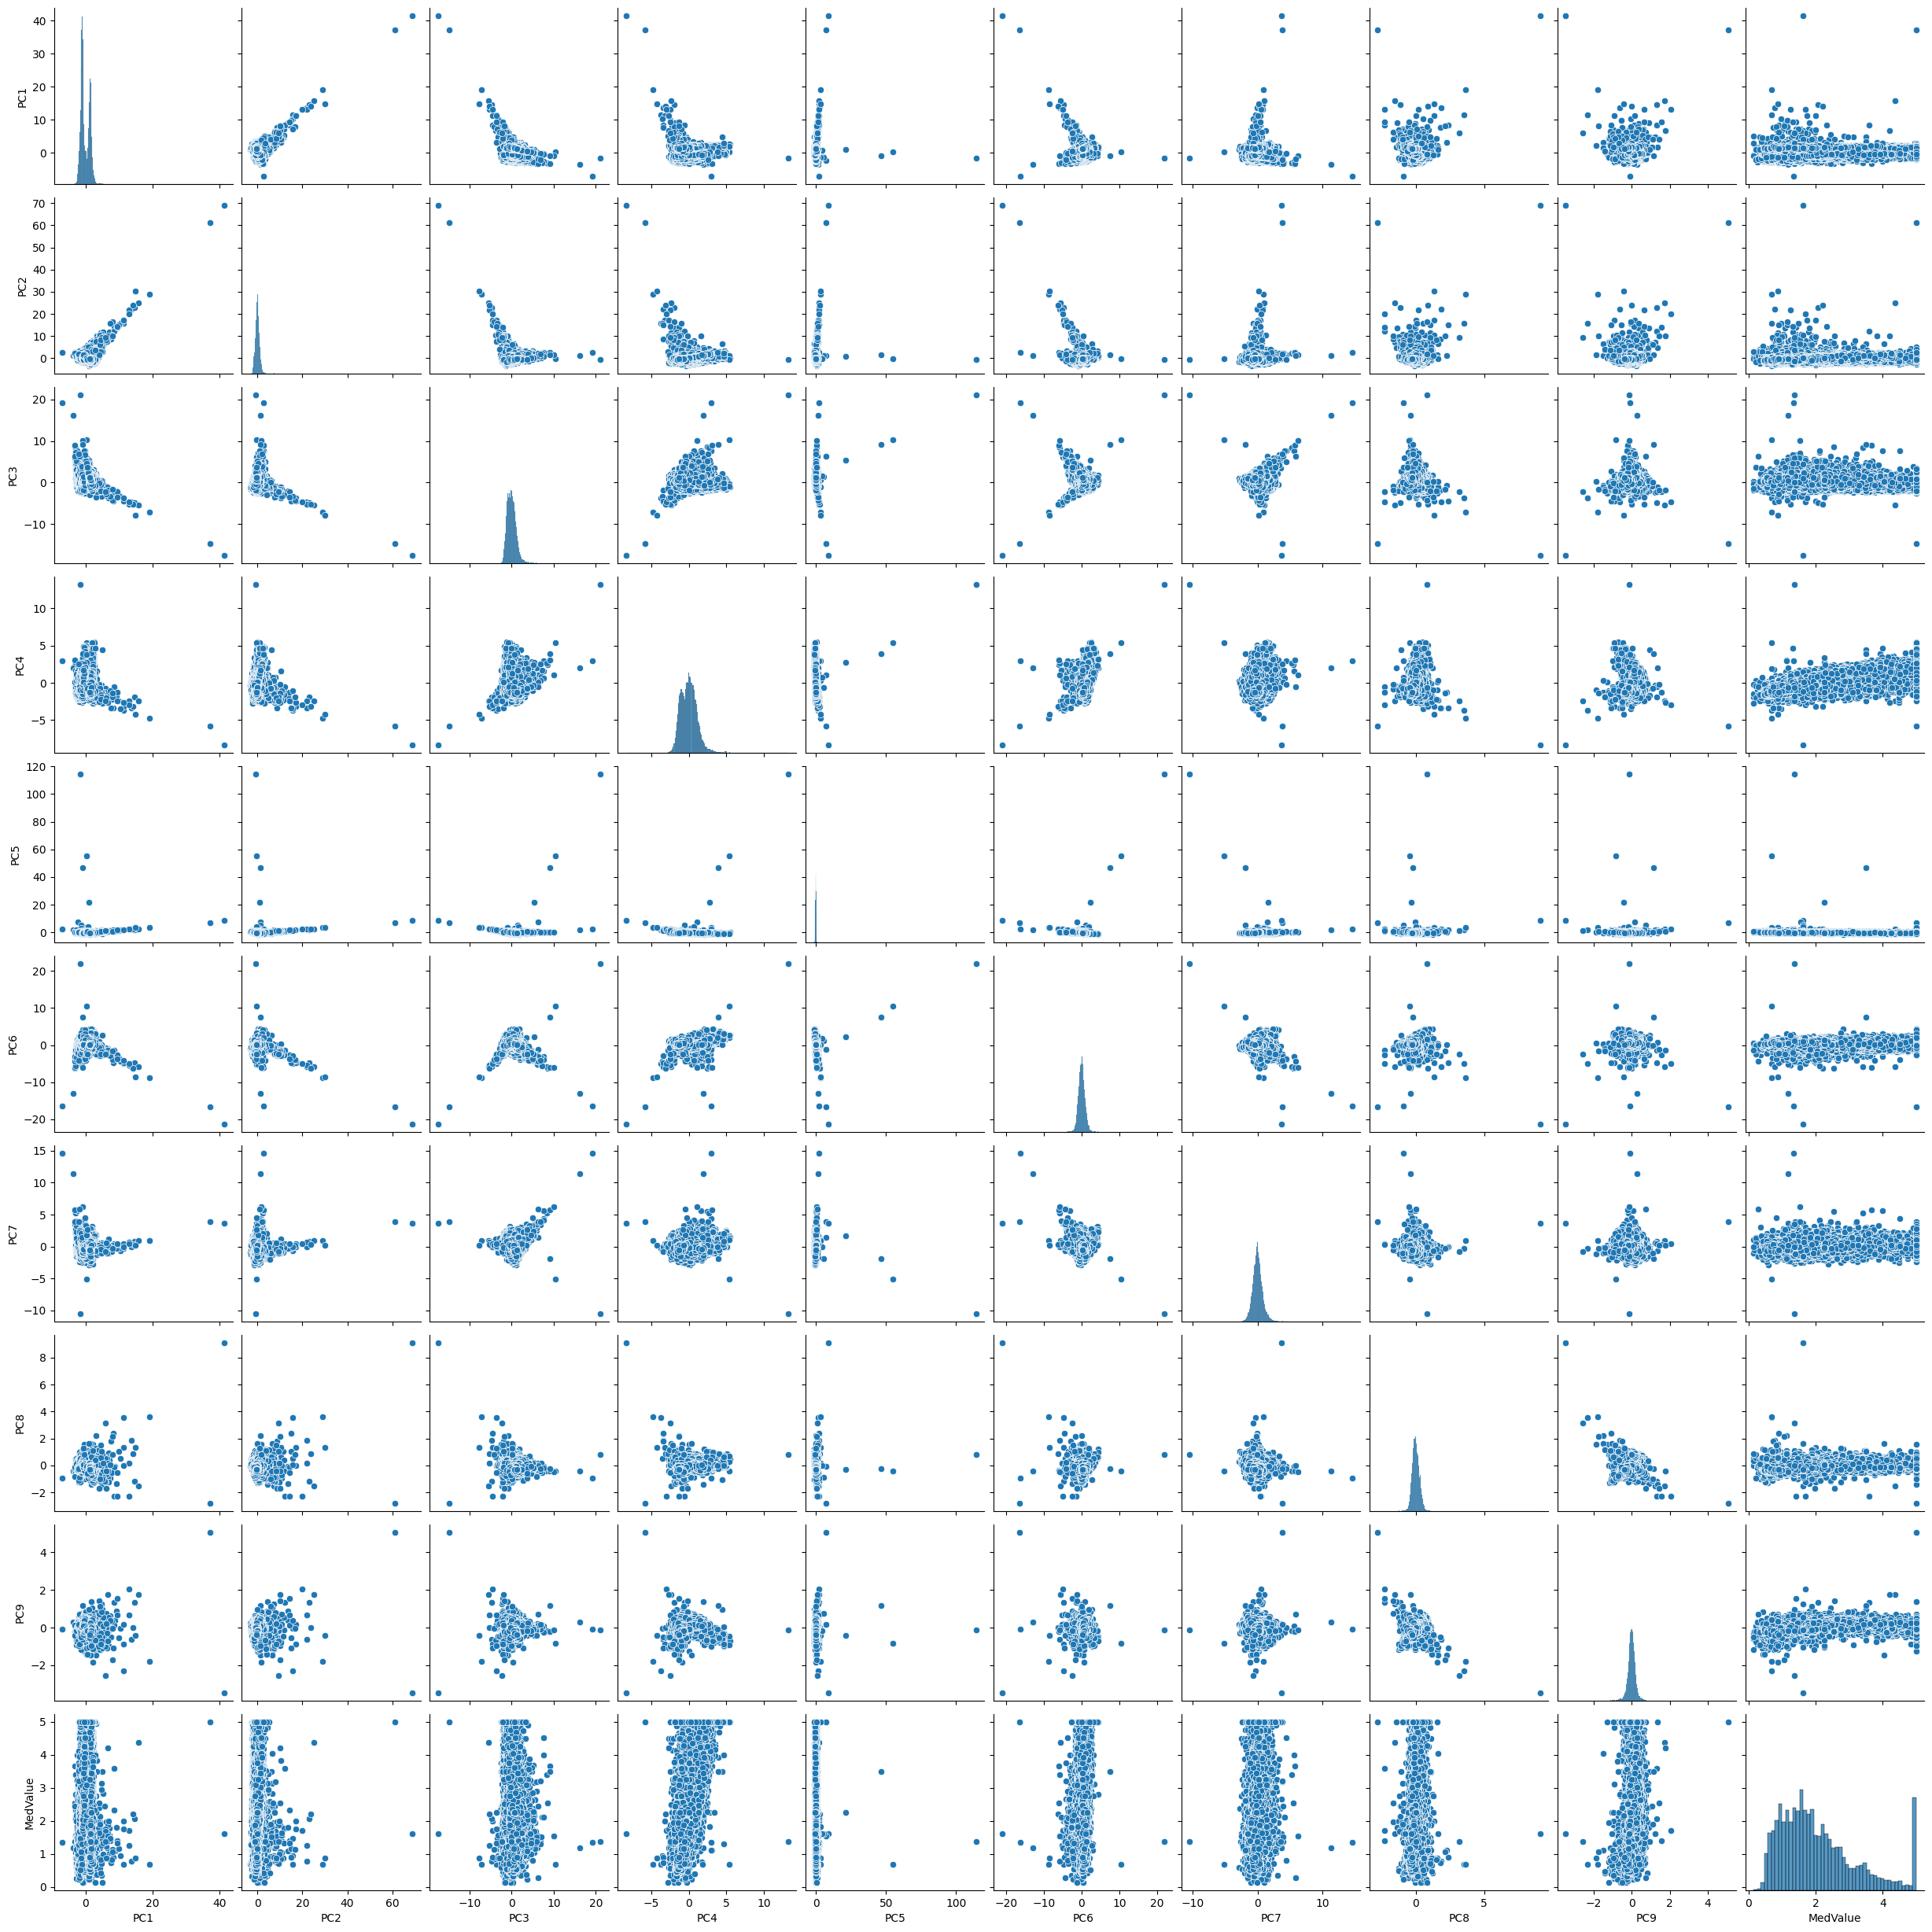

In [15]:
sns.pairplot(transformed_dataset)

In [16]:
transformed_data.shape

(20640, 9)

In [17]:
# var = pca.explained_variance_ratio_.sum() * 100
# fig = px.scatter_matrix(
#         transformed_dataset.drop(columns=["MedValue"]).drop(columns=["MedValue"]),
#         color=transformed_dataset[["MedValue"]],
#         title=f'Total Explained Variance: {var:.2f}%')
# fig.update_traces(diagonal_visible=False)
# fig.show()

In [18]:
fig = px.scatter_3d(transformed_dataset, x='PC1', y='PC2', z='PC3', 
                    size_max=12,
                    color="MedValue",
                    opacity=0.7)

fig.update_layout(
    title='PCA Visualization', 
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title="PC1 (" + str(explained_variance_ratio["explained variance ratio"]["PC1"]) + "%)",
        yaxis_title="PC2 (" + str(explained_variance_ratio["explained variance ratio"]["PC2"]) + "%)",
        zaxis_title="PC3 (" + str(explained_variance_ratio["explained variance ratio"]["PC3"]) + "%)",
    ),
)

fig.update_traces(marker=dict(size=3.5, symbol="diamond"))

In [19]:
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction")
fig.show()